In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ptitprince as pt
import polars as pl
from scipy import stats as st
import statistics

# setting up the data set as arrays
# the data is the hours spent talking on cellphones by each respondent

males_hours = np.array([12, 4, 11, 13, 11,
                        7, 9, 10, 10, 7,
                        7, 12, 6, 9, 15,
                        10, 11, 12, 7, 8,
                        8, 9, 11, 10, 9,
                        10, 9, 9, 7, 9,
                        11, 7, 10, 10, 11,
                        9, 12, 12, 8, 13,
                        9, 10, 8, 11, 10,
                        13, 13, 9, 10, 13])


females_hours = np.array([11, 9, 7, 10, 9,
                          10, 10, 7, 9, 10,
                          11, 8, 9, 6, 11,
                          10, 7, 9, 12, 14,
                          11, 12, 12, 8, 12,
                          12, 9, 10, 11, 7,
                          12, 7, 9, 8, 11,
                          10, 8, 13, 8, 10,
                          9, 9, 9, 11, 9,
                          9, 8, 9, 12, 11])

combined_hours = [males_hours, females_hours]

genders = ["males", "females"]

print(combined_hours)

[array([12,  4, 11, 13, 11,  7,  9, 10, 10,  7,  7, 12,  6,  9, 15, 10, 11,
       12,  7,  8,  8,  9, 11, 10,  9, 10,  9,  9,  7,  9, 11,  7, 10, 10,
       11,  9, 12, 12,  8, 13,  9, 10,  8, 11, 10, 13, 13,  9, 10, 13]), array([11,  9,  7, 10,  9, 10, 10,  7,  9, 10, 11,  8,  9,  6, 11, 10,  7,
        9, 12, 14, 11, 12, 12,  8, 12, 12,  9, 10, 11,  7, 12,  7,  9,  8,
       11, 10,  8, 13,  8, 10,  9,  9,  9, 11,  9,  9,  8,  9, 12, 11])]


## 1 (10 points)
Formulate and present the rationale for a hypothesis test that the researcher could use to compare the mean time spent on cell phones by male and female college students per week.


Given two samples, which are not paired, the immediate intuition is to use an independent samples t-test, or another test that compares the means of the two independent groups of samples, if the normality and/or homogeneity of the two groups cannot be assumed.

But the end goal is that, we must compare the mean hours spent talking on cellphones by men, and the mean hours spent talking on cellphones by women

The null hypothesis would be $H_{0}= \mu_{males} = \mu_{females}$

while the alternative hypothesis would be $H_{1}= \mu_{male} \neq \mu_{females}$

## 2 (30 points)
Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for the researcher?

The following are assumptions of an independent samples t-test:

1. That the dependent variable, the number of hours per week spent talking on their cell phones, is continuous
2. That there are two categorical variables, which is in this case males and females
3. That each participant is present in only one group.
4. That there are no significant outliers in either groups.
5. That each group is normally distributed.
6. And that there is an equality of variances between the two groups

The first three assumptions are satisfied

To check for outliers, we'll create a boxplot.
We dont need a raincloud, since we'll be looking for outliers only




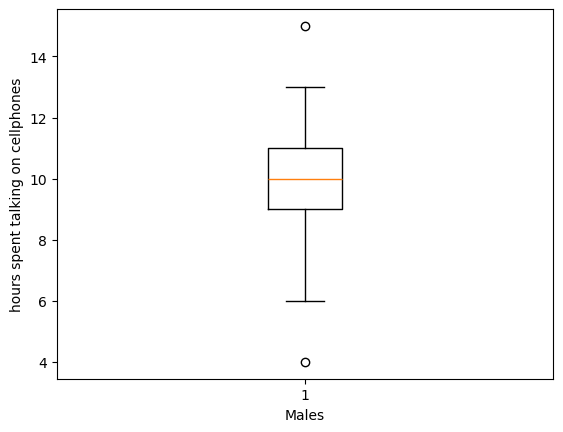

In [2]:
# for males:

fig_male = plt.figure()

# Creating plot
plt.boxplot(males_hours)

plt.ylabel("hours spent talking on cellphones")
plt.xlabel("Males")

# show plot
plt.show()

There are two outliers for the Male data, but we can check if it's a mild outlier or an extreme outlier:

from the plot, we can deduce that the interquartile range (IQR) is 2

Subtracting the lowest whisker, which is at 6, by 1.5(IQR), which is 3, gives us 3
The minimum value of the data, which is at 4, is greater than $6- 1.5(IQR)=3$, making it a mild outlier

Doing the same for the top whisker:
The maximum value of the data, 15, is less than $13+1.5(IQR) = 16$, making it a mild outlier

Therefore, there are no significant outliers in the data for males.

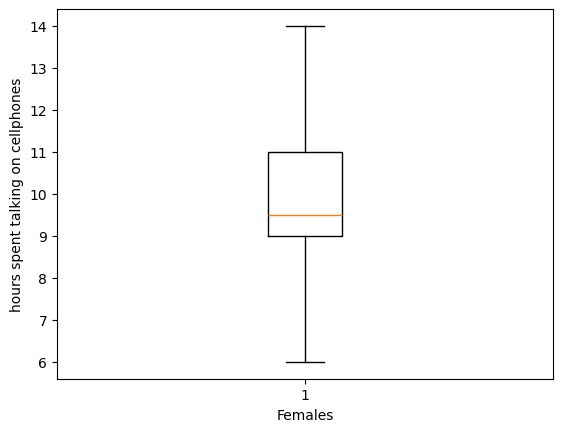

In [3]:
# For Females:

fig_female = plt.figure()

# Creating plot
plt.boxplot(females_hours)

plt.ylabel("hours spent talking on cellphones")
plt.xlabel("Females")

# show plot
plt.show()

There are no outliers in the female data

Therefore, there are no significant outliers in both groups
and assumption 4 is passed

In [4]:
# checking for normality using the shapiro-wilk test:

for idx, data in enumerate([males_hours, females_hours]):
    test_stat, pval = st.shapiro(data)
    print(f"The shapiro test statistic for hours spent talking on cellphones {genders[idx]} is {test_stat} and its p value is {pval} ")

The shapiro test statistic for hours spent talking on cellphones males is 0.9746539794869001 and its p value is 0.3539889622001455 
The shapiro test statistic for hours spent talking on cellphones females is 0.9638767847871548 and its p value is 0.12919719507959687 


Both males and females data on hours spent talking on cellphones are normally distributed, as evidenced by a p-value greater than 0.05

In [5]:
# checking for homogeneity using levene's test:

lev_stat, levpval = st.levene(males_hours, females_hours)
print(f"The Levene test statistic for hours spent talking on cellphones is {lev_stat} and its p value is {levpval} ")

The Levene test statistic for hours spent talking on cellphones is 0.6943460393935098 and its p value is 0.4067163398636344 


The two samples have an equality of variance, as evidenced by a p-value greater than 0.05

In [6]:
# doing independent samples t-test

t_stat, tpval = st.ttest_ind(males_hours, females_hours)
print(f"The Independent samples t-test test statistic for is {t_stat} and its p value is {tpval} ")

The Independent samples t-test test statistic for is 0.30394907866566184 and its p value is 0.7618111039906375 


# Interpretation
As evidenced by a low t-value, and a p-value greater than 0.05, there is no significant difference between the hours spent talking on cellphones between males and females, i.e. we cannot reject the null hypothesis.

# Recommendation
Investigate aslo if there is a difference between the two groups regarding the mean hours of sleep hours; doing productive work; doing non productive work; and hours doing activities that doesn't involve phones.

## 3 (10 points)
Provide descriptive statistical summaries of the data for each gender category.

In [8]:
# Summary for males

val_m = []
stats_m = []

#val_mid
stats_m.append("val_mid")

#check if digit/int
val_count_m = 0
for num in males_hours:
    if str(num).isdigit():
        val_count_m += 1 

val_m.append(val_count_m)


# mode
stats_m.append("Mode")
val_m.append(min(st.mode(males_hours)))


# median 
stats_m.append("Median")
val_m.append(np.median(males_hours))


# mean
stats_m.append("mean")
val_m.append(np.mean(males_hours))


# standard deviation
stats_m.append("st. dev")
val_m.append(np.std(males_hours))


# variance
stats_m.append("variance")
val_m.append(np.var(males_hours))


# skewness
stats_m.append("Skewness")
val_m.append(st.skew(males_hours))


# std error skewness
stats_m.append("std error of skewness")
val_m.append( (6/len(males_hours))**(1/2) )


# kurtosis
stats_m.append("kurtosis")
val_m.append(st.kurtosis(males_hours))


# std error kurtosis
stats_m.append("std error of kurtosis")
val_m.append( (24/len(males_hours))**(1/2) )


# minimum
stats_m.append("Minimum")
val_m.append(min(males_hours))


# maximum
stats_m.append("Maximum")
val_m.append(max(males_hours))


# 25p
stats_m.append("25th Percentile")
val_m.append( st.scoreatpercentile(males_hours,25) )


# 50p
stats_m.append("50th Percentile")
val_m.append( st.scoreatpercentile(males_hours,50) )


# 75p
stats_m.append("75th Percentile")
val_m.append( st.scoreatpercentile(males_hours,75) )

# 90p
stats_m.append("90th Percentile")
val_m.append( st.scoreatpercentile(males_hours,90) )

# 95p
stats_m.append("95th Percentile")
val_m.append( st.scoreatpercentile(males_hours,95) )


table_input_m = {"Statistic" : stats_m, "Score" : val_m}

df_m = pl.DataFrame(table_input_m, strict = False)

with pl.Config(tbl_rows=17):

    print(df_m)

shape: (17, 2)
┌───────────────────────┬───────────┐
│ Statistic             ┆ Score     │
│ ---                   ┆ ---       │
│ str                   ┆ f64       │
╞═══════════════════════╪═══════════╡
│ val_mid               ┆ 50.0      │
│ Mode                  ┆ 9.0       │
│ Median                ┆ 10.0      │
│ mean                  ┆ 9.82      │
│ st. dev               ┆ 2.13251   │
│ variance              ┆ 4.5476    │
│ Skewness              ┆ -0.111207 │
│ std error of skewness ┆ 0.34641   │
│ kurtosis              ┆ 0.042378  │
│ std error of kurtosis ┆ 0.69282   │
│ Minimum               ┆ 4.0       │
│ Maximum               ┆ 15.0      │
│ 25th Percentile       ┆ 9.0       │
│ 50th Percentile       ┆ 10.0      │
│ 75th Percentile       ┆ 11.0      │
│ 90th Percentile       ┆ 13.0      │
│ 95th Percentile       ┆ 13.0      │
└───────────────────────┴───────────┘


In [11]:
# For females

val_f = []
stats_f = []

#val_mid
stats_f.append("val_mid")

#check if digit/int
val_count_f = 0
for num in females_hours:
    if str(num).isdigit():
        val_count_f += 1 

val_f.append(val_count_f)


# mode
stats_f.append("Mode")
val_f.append(min(st.mode(females_hours)))


# median 
stats_f.append("Median")
val_f.append(np.median(females_hours))


# mean
stats_f.append("mean")
val_f.append(np.mean(females_hours))


# standard deviation
stats_f.append("st. dev")
val_f.append(np.std(females_hours))


# variance
stats_f.append("variance")
val_f.append(np.var(females_hours))


# skewness
stats_f.append("Skewness")
val_f.append(st.skew(females_hours))


# std error skewness
stats_f.append("std error of skewness")
val_f.append( (6/len(females_hours))**(1/2) )


# kurtosis
stats_f.append("kurtosis")
val_f.append(st.kurtosis(females_hours))


# std error kurtosis
stats_f.append("std error of kurtosis")
val_f.append( (24/len(females_hours))**(1/2) )


# minimum
stats_f.append("Minimum")
val_f.append(min(females_hours))


# maximum
stats_f.append("Maximum")
val_f.append(max(females_hours))


# 25p
stats_f.append("25th Percentile")
val_f.append( st.scoreatpercentile(females_hours,25) )


# 50p
stats_f.append("50th Percentile")
val_f.append( st.scoreatpercentile(females_hours,50) )


# 75p
stats_f.append("75th Percentile")
val_f.append( st.scoreatpercentile(females_hours,75) )

# 90p
stats_f.append("90th Percentile")
val_f.append( st.scoreatpercentile(females_hours,90) )

# 95p
stats_f.append("95th Percentile")
val_f.append( st.scoreatpercentile(females_hours,95) )


table_input_f = {"Statistic" : stats_f, "Score" : val_f}

df_f = pl.DataFrame(table_input_f, strict=False)

with pl.Config(tbl_rows=17):

    print(df_f)

shape: (17, 2)
┌───────────────────────┬──────────┐
│ Statistic             ┆ Score    │
│ ---                   ┆ ---      │
│ str                   ┆ f64      │
╞═══════════════════════╪══════════╡
│ val_mid               ┆ 50.0     │
│ Mode                  ┆ 9.0      │
│ Median                ┆ 9.5      │
│ mean                  ┆ 9.7      │
│ st. dev               ┆ 1.75784  │
│ variance              ┆ 3.09     │
│ Skewness              ┆ 0.130345 │
│ std error of skewness ┆ 0.34641  │
│ kurtosis              ┆ -0.51648 │
│ std error of kurtosis ┆ 0.69282  │
│ Minimum               ┆ 6.0      │
│ Maximum               ┆ 14.0     │
│ 25th Percentile       ┆ 9.0      │
│ 50th Percentile       ┆ 9.5      │
│ 75th Percentile       ┆ 11.0     │
│ 90th Percentile       ┆ 12.0     │
│ 95th Percentile       ┆ 12.0     │
└───────────────────────┴──────────┘


## 4 (10 points)

What is the 95% confidence interval for the population mean of each gender category, and what is the 95% confidence interval for the difference between the means of the two populations?

Since we would be using the 95% confidence interval, $z=|1.96|$

The formula for the confidence interval (CI) for the population mean of each group is:

$CI = \mu_{x} \pm z(\frac{\sigma_{x}}{\sqrt{n}})$

where,

$\mu_{x}$ is the sample mean

$\sigma_{x}$ is the sample standard deviation

$n$ is the sample size

In [12]:
z = 1.96

# for males
m_mean = np.mean(males_hours)
m_std = np.std(males_hours)
m_n = val_count_m

# calculating confidence interval for males:

ci_m_minus = m_mean - z*( m_std / (m_n**(1/2) ) )
ci_m_plus = m_mean + z*( m_std / (m_n**(1/2) ) )
print(f"the minimum of the confidence interval for males is {ci_m_minus}, while the maximum is {ci_m_plus}")

# for females
f_mean = np.mean(females_hours)
f_std = np.std(females_hours)
f_n = val_count_f

# calculating confidence interval for males:

ci_f_minus = f_mean - z*( f_std / (f_n**(1/2) ) )
ci_f_plus = f_mean + z*( f_std / (f_n**(1/2) ) )
print(f"the minimum of the confidence interval for females is {ci_f_minus}, while the maximum is {ci_f_plus}")


the minimum of the confidence interval for males is 9.22889831399327, while the maximum is 10.411101686006731
the minimum of the confidence interval for females is 9.212751726529483, while the maximum is 10.187248273470516


The confidence interval shows that, since there is an overlap between the confidence interval of both groups, there is no significant difference between the two groups.

It can also be seen that 95% of the population, or that there is a 95% chance, that the male spends 9.23 to 10.41 hours on the phone,
while for females, the numbers are 9.21 to 10.19

From the definition of the confidence interval of the difference of two means:

$CI_{\mu_{m} - \mu_{f}} = \mu_{m} - \mu_{f} \pm z( \sqrt{ \frac{\sigma_{m}^{2}}{n_m}-\frac{\sigma_{f}^{2}}{n_f} } )$

where,

$\mu_{m}$ is the sample mean for the males

$\mu_{f}$ is the sample mean for the females

$\sigma_{m}^{2}$ is the sample variance for the males

$\sigma_{f}^{2}$ is the sample variance for the females

$n_{m}$ is the sample size for the males

$n_{f}$ is the sample size for the females

In [16]:
# solving for confidence interval of two means:

m_var = np.var(males_hours)
f_var = np.var(females_hours)

ci_diff_min = m_mean - f_mean - z*( ( (m_var/m_n) - (f_var/f_n) )**(1/2) )
ci_diff_max = m_mean - f_mean + z*( ( (m_var/m_n) - (f_var/f_n) )**(1/2) )
print(f"the minimum of the confidence interval for the difference between males and females is {ci_diff_min}, while the maximum is {ci_diff_max}")

the minimum of the confidence interval for the difference between males and females is -0.21464955281607562, while the maximum is 0.4546495528160776


## 5 (20 points)

Do you see a need for larger sample sizes and more testing with the time spent on cell phones? Discuss.

A larger sample size would probably help, but then the hypothesis test would need to switch to a z-test.

A larger sample size would also help us determine if there is at least a small difference, i.e making sure that we are more accurate in rejecting the null hypothesis that there is no difference between the two groups.

A more precise data tabulation, counting the minutes as decimals of the hour, would also help in accuracy.

Several avenues related to the study should also be considered, such as hours doing other activities when using mobile phones; hours of productive vs unproductive use; and between groups other than gender.

## 6 (20 points)

Make a report including the testing of the assumptions for two independent samples t-test.

## Results

In [21]:
table_input_com = {"Statistic" : stats_f, "Score_male" : val_m, "Score_female" : val_f}
df_com = pl.DataFrame(table_input_com, strict=False)
with pl.Config(tbl_rows=17):
    
    print(df_com)

shape: (17, 3)
┌───────────────────────┬────────────┬──────────────┐
│ Statistic             ┆ Score_male ┆ Score_female │
│ ---                   ┆ ---        ┆ ---          │
│ str                   ┆ f64        ┆ f64          │
╞═══════════════════════╪════════════╪══════════════╡
│ val_mid               ┆ 50.0       ┆ 50.0         │
│ Mode                  ┆ 9.0        ┆ 9.0          │
│ Median                ┆ 10.0       ┆ 9.5          │
│ mean                  ┆ 9.82       ┆ 9.7          │
│ st. dev               ┆ 2.13251    ┆ 1.75784      │
│ variance              ┆ 4.5476     ┆ 3.09         │
│ Skewness              ┆ -0.111207  ┆ 0.130345     │
│ std error of skewness ┆ 0.34641    ┆ 0.34641      │
│ kurtosis              ┆ 0.042378   ┆ -0.51648     │
│ std error of kurtosis ┆ 0.69282    ┆ 0.69282      │
│ Minimum               ┆ 4.0        ┆ 6.0          │
│ Maximum               ┆ 15.0       ┆ 14.0         │
│ 25th Percentile       ┆ 9.0        ┆ 9.0          │
│ 50th Percen

In [24]:
# The t-test result:
print(f"The Independent samples t-test test statistic for is {t_stat} and its p value is {tpval} ", end="\n\n")

# Confidence Intervals

print(f"the confidence interval for males is between {ci_m_minus} and {ci_m_plus}", end="\n\n")
print(f"the confidence interval for females is between {ci_f_minus} and {ci_f_plus}", end="\n\n")
print(f"the confidence interval for the difference between males and females is between {ci_diff_min} and {ci_diff_max}", end="\n\n")

The Independent samples t-test test statistic for is 0.30394907866566184 and its p value is 0.7618111039906375 

the confidence interval for males is between 9.22889831399327 and 10.411101686006731

the confidence interval for females is between 9.212751726529483 and 10.187248273470516

the confidence interval for the difference between males and females is between -0.21464955281607562 and 0.4546495528160776



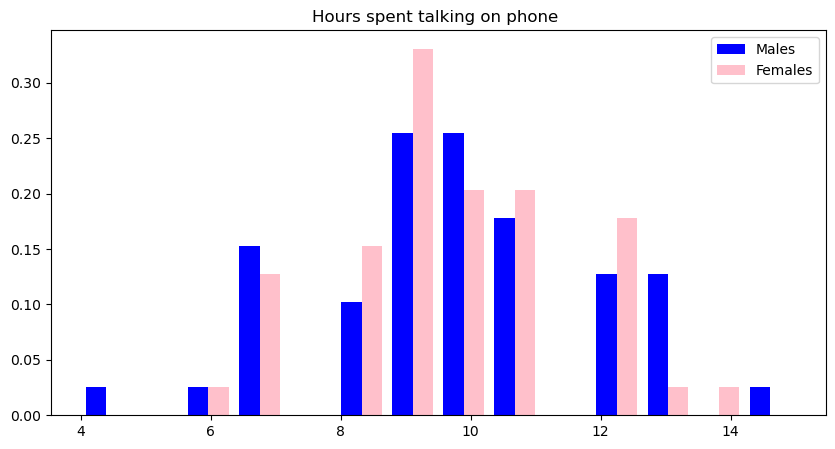

In [37]:
# graph

fig = fig = plt.figure(figsize = (10, 5))
colors = ["blue", "pink"]
plt.hist(combined_hours, 14, density=True, histtype='bar', color=colors,  label = ["Males", "Females"])
plt.legend()
plt.title("Hours spent talking on phone ")
plt.show()

## Interpretation

As can be seen from the data, the mean of both groups, with the male group having a mean of 9.82, and the female group having a mean of 9.7, is arithmetically close to each other. 

However, the spread of the female group, with a variance of 3.09, is smaller than the spread of the male group, which has a variance of 4.55.

When testing the null hypothesis, we found that the null hypothesis holds, with the independent samples t-test yielding a p-value of 0.76, which is greater than the alpha of 0.05. This, alongside the hugely overlapping confidence intervals, which is further exemplified by the small confidence interval of the difference in means, shows us that there is no significant difference between the two groups in terms of the hours spent on their use of cellphones to communicate.